In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("hospital_data.csv")
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,11/4/2019 0:00,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001
1,11/6/2019 0:00,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002
2,11/2/2019 0:00,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003
3,11/6/2019 0:00,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004
4,11/1/2019 0:00,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005


In [3]:
df.dtypes #checking the data types of each elements.

Date                      object
 Medication Revenue       object
  Lab Cost                object
 Consultation Revenue     object
Doctor Type               object
Financial Class           object
Patient Type              object
Entry Time                object
Post-Consultation Time    object
Completion Time           object
Doctor                    object
Patient ID                object
dtype: object

#### changing the type of the date and time from string/object to date time using "pandas.to_datetime()".

In [5]:
df["Date"] = pd.to_datetime(df["Date"]) 
df["Entry Time"] = pd.to_datetime(df["Entry Time"])
df["Post-Consultation Time"] = pd.to_datetime(df["Post-Consultation Time"])
df["Completion Time"] = pd.to_datetime(df["Completion Time"])
df.dtypes # use DataFrame.astype(dtype,copu=True,errors='raise') to change it to other type of data types.

Date                      datetime64[ns]
 Medication Revenue               object
  Lab Cost                        object
 Consultation Revenue             object
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

In [41]:
df.columns # to get the column names but we get few blanks in the result.

Index(['Date', ' Medication Revenue ', '  Lab Cost ', ' Consultation Revenue ',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID'],
      dtype='object')

In [42]:
'''
Series.str.strip(*args, **kwargs)[source]
Remove leading and trailing characters.

Strip whitespaces (including newlines) or a set of specified characters from each string in the Series/Index from left and right sides. Equivalent to str.strip().
'''

'\nSeries.str.strip(*args, **kwargs)[source]\nRemove leading and trailing characters.\n\nStrip whitespaces (including newlines) or a set of specified characters from each string in the Series/Index from left and right sides. Equivalent to str.strip().\n'

In [7]:
df.columns = df.columns.str.strip() # strip is used to remove the whitespaces in the columns.
df.columns # the whitespaces or the blank spaces are removed.

Index(['Date', 'Medication Revenue', 'Lab Cost', 'Consultation Revenue',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID'],
      dtype='object')

In [8]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,2019-11-04,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,2020-12-02 08:35:45,2020-12-02 09:17:54,2020-12-02 09:29:46,DR05350C4,C10001
1,2019-11-06,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,2020-12-02 19:19:16,2020-12-02 21:02:36,2020-12-02 21:24:07,DR09451Z4,C10002
2,2019-11-02,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,2020-12-02 10:46:52,2020-12-02 11:56:25,2020-12-02 12:06:28,DR17400I4,C10003
3,2019-11-06,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,2020-12-02 09:38:34,2020-12-02 10:55:50,2020-12-02 10:58:02,DR09451Z4,C10004
4,2019-11-01,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,2020-12-02 11:16:21,2020-12-02 12:06:49,2020-12-02 12:06:54,DR15154H4,C10005


#### Create a function to clean the text as it contains dollar signs and commas.

In [9]:
df["Medication Revenue"]

0        $1,183.22 
1          $738.48 
2          $660.00 
3          $600.00 
4          $591.60 
            ...    
29994         $-   
29995         $-   
29996         $-   
29997         $-   
29998         $-   
Name: Medication Revenue, Length: 29999, dtype: object

In [10]:
def clean_text(x): # x is a column.
    x=x.replace("$","") #replacing $ with nothing.
    x=x.replace(",","")
    x=x.replace("-","")
    x=x.replace(" ","")
    x=pd.to_numeric(x) # converting the cleaned column type to numeric.
    return x
df["Medication Revenue"] = df["Medication Revenue"].apply(clean_text) # applying the function to "Medication Revenue" column
df.head() # "Medication Revenue" column has been cleaned from $,$- etc.

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,2019-11-04,1183.22,$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,2020-12-02 08:35:45,2020-12-02 09:17:54,2020-12-02 09:29:46,DR05350C4,C10001
1,2019-11-06,738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,2020-12-02 19:19:16,2020-12-02 21:02:36,2020-12-02 21:24:07,DR09451Z4,C10002
2,2019-11-02,660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,2020-12-02 10:46:52,2020-12-02 11:56:25,2020-12-02 12:06:28,DR17400I4,C10003
3,2019-11-06,600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,2020-12-02 09:38:34,2020-12-02 10:55:50,2020-12-02 10:58:02,DR09451Z4,C10004
4,2019-11-01,591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,2020-12-02 11:16:21,2020-12-02 12:06:49,2020-12-02 12:06:54,DR15154H4,C10005


In [11]:
df.dtypes # "Medication Revenue" data type is changet to float from object.

Date                      datetime64[ns]
Medication Revenue               float64
Lab Cost                          object
Consultation Revenue              object
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

In [12]:
# cleaning rest of the columns with appropriate data type.
df["Lab Cost"] = df["Lab Cost"].apply(clean_text)
df["Consultation Revenue"] = df["Consultation Revenue"].apply(clean_text)
df.dtypes

Date                      datetime64[ns]
Medication Revenue               float64
Lab Cost                         float64
Consultation Revenue             float64
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

###### Creating a new column "total_revenue

In [13]:
df["total_revenue"] = df["Medication Revenue"] + df["Lab Cost"] + df["Consultation Revenue"]
df.head() # we can see the last column as "total_revenue" and we have to deal with NaN.

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,total_revenue
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2020-12-02 08:35:45,2020-12-02 09:17:54,2020-12-02 09:29:46,DR05350C4,C10001,1213.39
1,2019-11-06,738.48,NaN,15.00,ANCHOR,INSURANCE,OUTPATIENT,2020-12-02 19:19:16,2020-12-02 21:02:36,2020-12-02 21:24:07,DR09451Z4,C10002,NaN
2,2019-11-02,660.00,NaN,21.17,ANCHOR,HMO,OUTPATIENT,2020-12-02 10:46:52,2020-12-02 11:56:25,2020-12-02 12:06:28,DR17400I4,C10003,NaN
3,2019-11-06,600.00,NaN,NaN,ANCHOR,MEDICARE,OUTPATIENT,2020-12-02 09:38:34,2020-12-02 10:55:50,2020-12-02 10:58:02,DR09451Z4,C10004,NaN
4,2019-11-01,591.60,NaN,12.00,ANCHOR,INSURANCE,OUTPATIENT,2020-12-02 11:16:21,2020-12-02 12:06:49,2020-12-02 12:06:54,DR15154H4,C10005,NaN


In [14]:
#Remove NaN using DataFrame.fillna().
df=df.fillna(0)
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,total_revenue
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2020-12-02 08:35:45,2020-12-02 09:17:54,2020-12-02 09:29:46,DR05350C4,C10001,1213.39
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,2020-12-02 19:19:16,2020-12-02 21:02:36,2020-12-02 21:24:07,DR09451Z4,C10002,0.00
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,2020-12-02 10:46:52,2020-12-02 11:56:25,2020-12-02 12:06:28,DR17400I4,C10003,0.00
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,2020-12-02 09:38:34,2020-12-02 10:55:50,2020-12-02 10:58:02,DR09451Z4,C10004,0.00
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,2020-12-02 11:16:21,2020-12-02 12:06:49,2020-12-02 12:06:54,DR15154H4,C10005,0.00


### What time has the most visitors

In [16]:
df["Entry hour"] = df["Entry Time"].dt.hour #Series.dt.hour : The hours of the datetime.
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,total_revenue,Entry hour
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2020-12-02 08:35:45,2020-12-02 09:17:54,2020-12-02 09:29:46,DR05350C4,C10001,1213.39,8
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,2020-12-02 19:19:16,2020-12-02 21:02:36,2020-12-02 21:24:07,DR09451Z4,C10002,0.00,19
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,2020-12-02 10:46:52,2020-12-02 11:56:25,2020-12-02 12:06:28,DR17400I4,C10003,0.00,10
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,2020-12-02 09:38:34,2020-12-02 10:55:50,2020-12-02 10:58:02,DR09451Z4,C10004,0.00,9
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,2020-12-02 11:16:21,2020-12-02 12:06:49,2020-12-02 12:06:54,DR15154H4,C10005,0.00,11


In [19]:
# Grouping by entry hour.
pivot1= df.groupby(df["Entry hour"])["Patient ID"].count()
pivot1

Entry hour
7       12
8     3489
9     4297
10    3680
11    3306
12    1446
13     426
14    3030
15    1847
16    1249
17     219
18    2600
19    2269
20    1358
21     500
22     238
23      33
Name: Patient ID, dtype: int64

### Visualizing

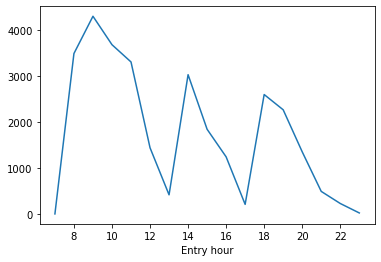

In [20]:
pivot1.plot()

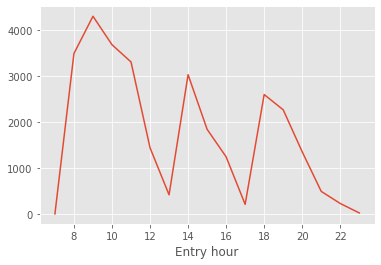

In [23]:
plt.style.use("ggplot")
pivot1.plot()

### Does the total revenue corelate relate with total visitors

In [26]:
pivot2=df.groupby(df["Entry hour"])["total_revenue"].sum()
pivot2

Entry hour
7         0.00
8     19959.28
9     11429.42
10     6060.60
11     5780.90
12      797.19
13      213.32
14     4696.92
15     1531.58
16     1082.93
17       40.10
18     2629.96
19     2115.09
20     1779.10
21      133.15
22      246.74
23        0.00
Name: total_revenue, dtype: float64

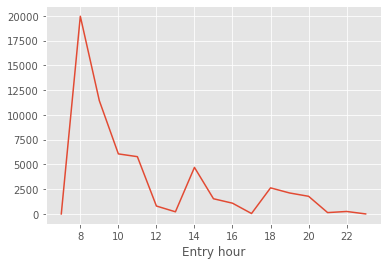

In [27]:
pivot2.plot()

In [29]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,total_revenue,Entry hour
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2020-12-02 08:35:45,2020-12-02 09:17:54,2020-12-02 09:29:46,DR05350C4,C10001,1213.39,8
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,2020-12-02 19:19:16,2020-12-02 21:02:36,2020-12-02 21:24:07,DR09451Z4,C10002,0.00,19
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,2020-12-02 10:46:52,2020-12-02 11:56:25,2020-12-02 12:06:28,DR17400I4,C10003,0.00,10
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,2020-12-02 09:38:34,2020-12-02 10:55:50,2020-12-02 10:58:02,DR09451Z4,C10004,0.00,9
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,2020-12-02 11:16:21,2020-12-02 12:06:49,2020-12-02 12:06:54,DR15154H4,C10005,0.00,11


In [31]:
pivot3=df.groupby("Entry hour").sum()
pivot4=df.groupby("Entry hour").count()
merge=pivot3.merge(pivot4,on="Entry hour")
merge.head()

,Medication Revenue_x,Lab Cost_x,Consultation Revenue_x,total_revenue_x,Date,Medication Revenue_y,Lab Cost_y,Consultation Revenue_y,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,total_revenue_y
Entry hour,,,,,,,,,,,,,,,,,
7,350.66,520.00,198.63,0.00,12,12,12,12,12,12,12,12,12,12,12,12,12
8,83404.62,22475.27,51180.15,19959.28,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489
9,96195.61,14879.28,60216.56,11429.42,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297
10,75239.66,6688.98,52072.67,6060.60,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680
11,72675.83,6860.23,48192.03,5780.90,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306


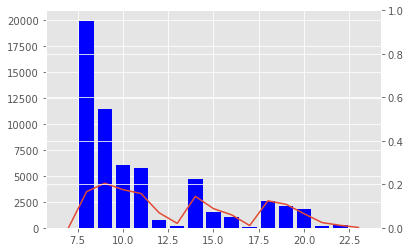

In [46]:
fig, ax1 = plt.subplots()
ax2 =ax1.twinx()
ax1.bar(merge.index,merge['total_revenue_x'],color='blue')
ax1.plot(merge.index,merge['Patient ID'])

## What percentage of revenue come from different Insurance types?


In [36]:
pivot5  = df.groupby('Financial Class').sum()

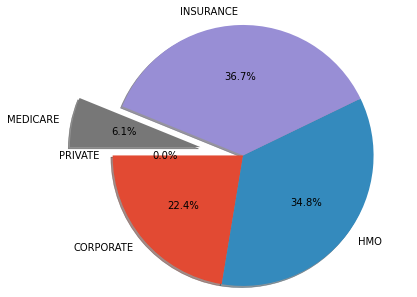

In [60]:
plt.axis("equal") # to keep the chart proper circular.
plt.pie(pivot5['total_revenue'],labels=pivot5.index,autopct='%1.1f%%',explode=(0,0,0,0.5,0),radius=1.5,shadow=True,startangle=180);